# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how='outer')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [152]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].unique()
len(number_of_mice)

249

In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice_id = duplicate_df["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [154]:
# Optional: Get all the data for the duplicate mouse ID. 
#drop_index = list(duplicate_df.index.values)
#print(drop_index)
filtered_df = combined_df[combined_df["Mouse ID"]==duplicate_mice_id[0]]
filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != duplicate_mice_id[0]]
clean_df.sample(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
139,l700,20,50.734768,1,Naftisol,Female,18,27
659,a492,25,54.701229,1,Stelasyn,Male,20,25
1717,x401,30,32.915292,0,Capomulin,Female,16,15
1217,y478,40,65.971120,1,Placebo,Female,3,25
1746,u364,5,45.760886,1,Capomulin,Male,18,17
964,w575,10,50.135955,1,Zoniferol,Female,16,28
730,a366,0,45.000000,0,Stelasyn,Female,16,29
1151,n763,30,55.413660,3,Placebo,Female,16,25
1663,i334,15,39.158001,0,Ramicane,Female,8,20
418,v199,0,45.000000,0,Naftisol,Female,17,29


In [156]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_df =clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median_df =clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_df =clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_df =clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_df =clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statisticsdf = pd.DataFrame({"Mean Tumor Volume": Mean_df,"Median Tumor Volume": Median_df, 
                                     "Tumor Volume Variance": var_df, "Tumor Volume Std.Dev": std_df,
                                    "Tumor Volume Std. Err.": sem_df})
summary_statisticsdf


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat_agg = clean_df.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stat_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

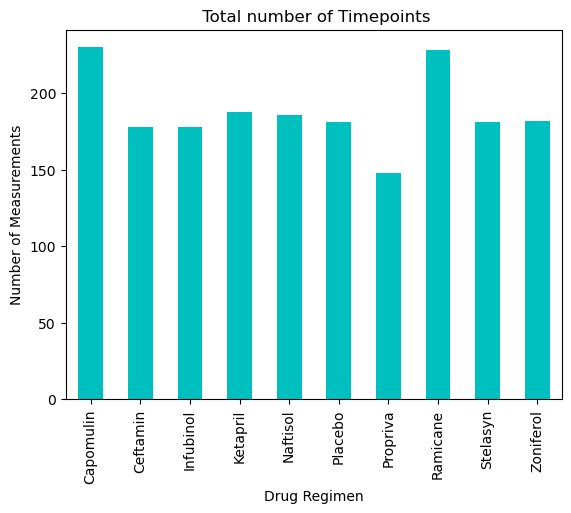

In [159]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = clean_df.groupby("Drug Regimen").count()["Timepoint"]
timepoints.plot.bar(x = "Drug Regimen",y = "Timepoint" ,color ="#00bfbf")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title(" Total number of Timepoints")
plt.xticks(rotation = 90)
plt.show()

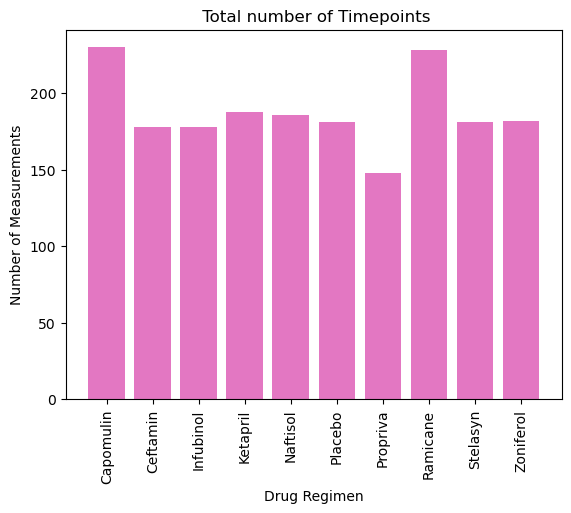

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints))
tick_locations = [ each for each in x_axis]
plt.bar(x_axis, timepoints , color ="#e377c2" , align = "center")
plt.tight_layout
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(ticks = tick_locations, labels = timepoints.index , rotation = 90)
plt.title(" Total number of Timepoints")
plt.show()

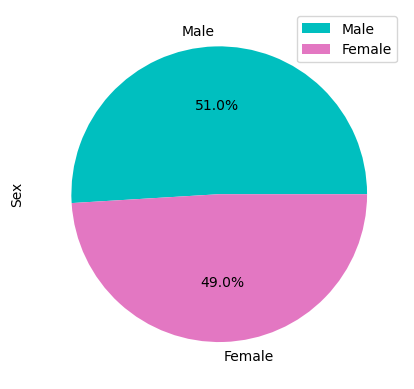

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malevsfemale = clean_df["Sex"].value_counts()
malevsfemaledf = pd.DataFrame(malevsfemale)
malevsfemale.plot(kind = "pie", legend = True, autopct = "%.1f%%" , colors = ["#00bfbf","#e377c2" ])
plt.show()

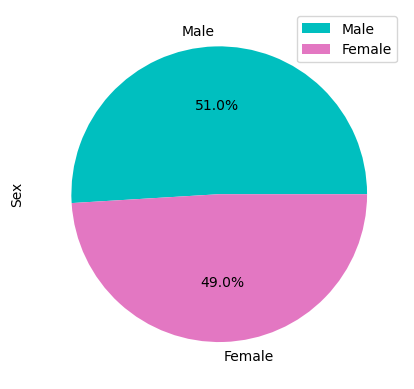

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = malevsfemaledf.index
#print(labels)
plt.pie(malevsfemale,labels = labels, autopct = "%.1f%%", colors = ["#00bfbf","#e377c2" ])
plt.ylabel("Sex")
plt.legend(["Male" ,"Female"])
plt.show()


## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepointdf = pd.DataFrame(clean_df.groupby(['Mouse ID'])["Timepoint"].max())
last_timepointdf =last_timepointdf.reset_index()
last_timepointdf.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepointdf,clean_df,on = ["Mouse ID","Timepoint"])
Capomulin_last_vol = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin")]
Ramicane_last_vol = merged_df.loc[(merged_df["Drug Regimen"] == "Ramicane")]
Infubinol_last_vol = merged_df.loc[(merged_df["Drug Regimen"] == "Infubinol")]
Ceftamin_last_vol = merged_df.loc[(merged_df["Drug Regimen"] == "Ceftamin")]
#print(capomulin_last_vol)

In [164]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_df= merged_df.loc[(merged_df["Drug Regimen"]=="Capomulin")|(merged_df["Drug Regimen"]=="Ramicane")|
                            (merged_df["Drug Regimen"]=="Infubinol")|(merged_df["Drug Regimen"]== "Ceftamin")]
drugs_name = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
upper_quartile = []
lower_quartile = []
iqr = []
upper_bound = []
lower_bound = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_name:
    outliers_counter = 0
    # Locate the rows which contain mice on each drug and get the tumor volumes
    get_quantiles = treatment_df["Tumor Volume (mm3)"].loc[treatment_df["Drug Regimen"]== drug].quantile([0.25,0.5,0.75])
    upper_quartile_each = get_quantiles[0.75]
    lower_quartile_each = get_quantiles[0.25]
    iqr_each = upper_quartile_each-lower_quartile_each
    upper_bound_each = upper_quartile_each + (1.5* iqr_each)
    lower_bound_each = lower_quartile_each - (1.5* iqr_each)
  
    
    # add subset 
    upper_quartile.append(upper_quartile_each)
    lower_quartile.append(lower_quartile_each)
    iqr.append(iqr_each)
    upper_bound.append(upper_bound_each)
    lower_bound.append(lower_bound_each)
    
    # Determine outliers using upper and lower bounds
    for each in (treatment_df["Tumor Volume (mm3)"].loc[(treatment_df["Drug Regimen"]==drug)]):
        if (each > upper_bound_each) | (each < lower_bound_each):
            outliers_counter = outliers_counter + 1
    outliers.append(outliers_counter)
    #print(outliers)

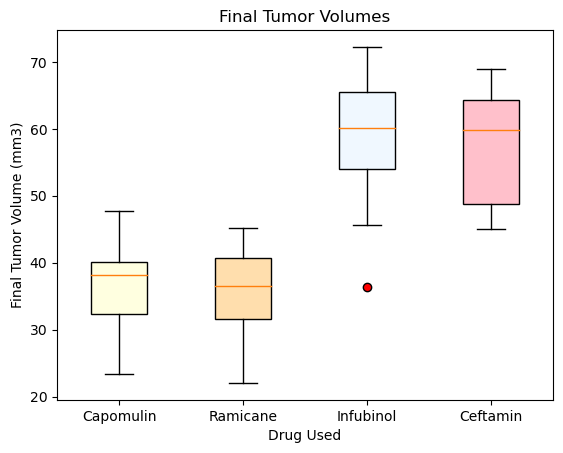

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
combined_data = [capomulin_last_vol["Tumor Volume (mm3)"],Ramicane_last_vol["Tumor Volume (mm3)"],
                 Infubinol_last_vol["Tumor Volume (mm3)"],Ceftamin_last_vol["Tumor Volume (mm3)"]]
out_patch = dict(markerfacecolor = "red", marker = "o")
box_plot = plt.boxplot(x = combined_data,labels = drugs_name, flierprops = out_patch,patch_artist = True)
colors = ["lightyellow","navajowhite","aliceblue","pink"]
plt.xlabel("Drug Used")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volumes")
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.show()

## Line and Scatter Plots

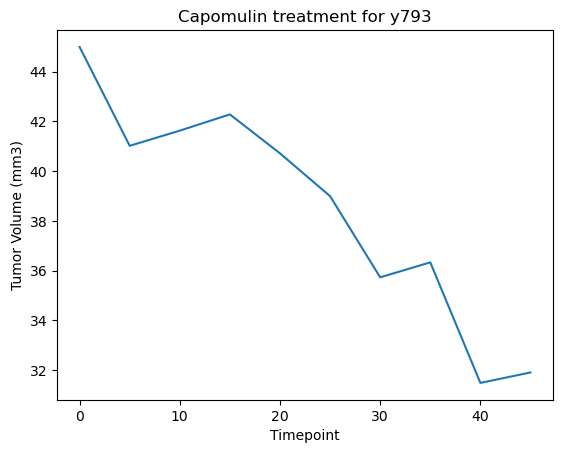

In [166]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
mouse_ID = "y793"
mouse_plotdata = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_ID]
plt.plot(mouse_plotdata["Timepoint"],mouse_plotdata["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment for {mouse_ID}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

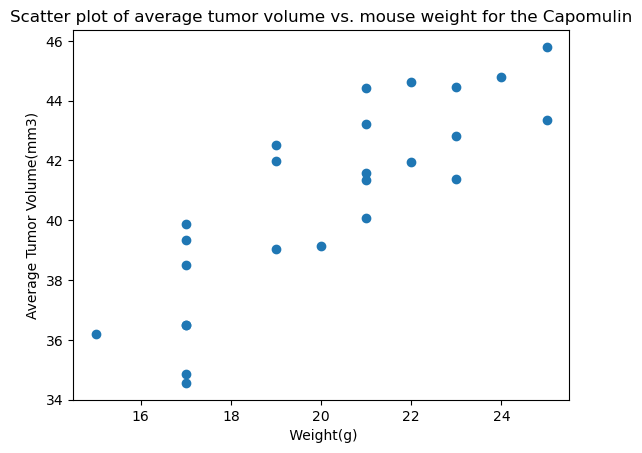

In [167]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mean = Capomulin_df.groupby("Mouse ID").mean()
weight_data = Capomulin_mean["Weight (g)"]
tumor_data = Capomulin_mean["Tumor Volume (mm3)"]
plt.scatter(weight_data,tumor_data)
plt.xlabel(" Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Scatter plot of average tumor volume vs. mouse weight for the Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


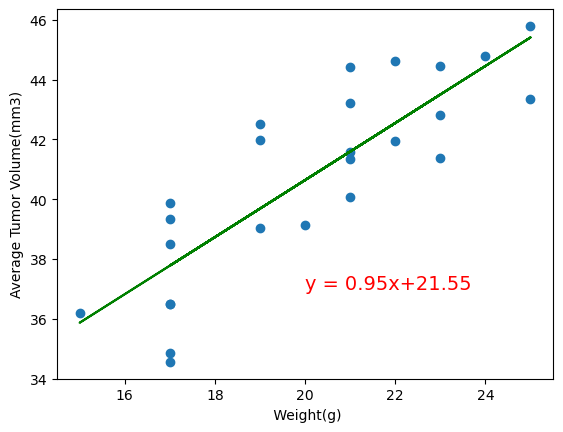

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr , pval = st.pearsonr(weight_data,tumor_data)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr,2)}")
(slope, intercept, rvalue, pvalue, stderrr) = st.linregress(weight_data,tumor_data)
regress_yvalues = slope*weight_data + intercept
plt.scatter(weight_data,tumor_data)
plt.plot(weight_data,regress_yvalues,"g")
plt.annotate("y = " + str(round(slope,2)) + "x+" + str(round(intercept,2)), (20,37), fontsize = 14 ,color = "r")
plt.xlabel(" Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")

plt.show()

